In [1]:
import pandas as pd
import sklearn.metrics 
import matplotlib.pyplot as plt
from Bio.PDB import PDBParser
import numpy as np
import glob
import os
import scipy.stats as stats
from scipy.stats import ttest_rel
from Bio import AlignIO

### wherever there is directory related information, please adjust the path information for files according to your local device

### obtaining MI of a protein
*  It is just an example for calculating MI score  of PF0007 family of protein

In [2]:
# Load the MSA file in FASTA format
msa_file = 'C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/PF00007.fasta'
msa = AlignIO.read(msa_file, 'fasta')

with open(msa_file) as f:
    print(f.read())

# Convert MSA to a numpy array
seqs = np.array([list(rec.seq) for rec in msa], np.character)

# Calculate the frequency matrix
freq_mat = np.array([(seqs == x).mean(axis=0) for x in np.unique(seqs)], np.float64)

# Calculate the MI matrix
mi_mat = np.zeros((msa.get_alignment_length(), msa.get_alignment_length()))
for i in range(msa.get_alignment_length()):
    for j in range(i+1, msa.get_alignment_length()):
        pij = freq_mat[:, i] * freq_mat[:, j]
        mi = (pij * np.log2(pij / (freq_mat[:, i][:, None] * freq_mat[:, j]))).sum()
        mi_mat[i, j] = mi
        mi_mat[j, i] = mi

# Convert MI matrix to co-evolution score matrix using Frobenius norm
ce_mat = np.sqrt(np.sum(np.square(mi_mat), axis=0))

# Visualize the co-evolution score matrix as a contact map
import matplotlib.pyplot as plt
plt.imshow(ce_mat, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/pf00007.fasta'

In [118]:
from Bio import AlignIO
import numpy as np
import os

# Define the directory where the alignment files are stored
align_dir = 'C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/'

# Get a list of all alignment files in the directory
align_files = [f for f in os.listdir(align_dir) if f.endswith('.clustal_num')]

# Loop through each alignment file and calculate MI matrix
for align_file in align_files:

    # Load the MSA file in clustal format
    msa = AlignIO.read(os.path.join(align_dir, align_file), 'clustal')

    # Convert MSA to a numpy array
    seqs = np.array([list(rec.seq) for rec in msa], dtype=str)

    # Calculate the frequency matrix
    freq_mat = np.array([(seqs == x).mean(axis=0) + 1e-9 for x in np.unique(seqs)], np.float64)

    # Calculate the MI matrix
    mi_mat = np.zeros((msa.get_alignment_length(), msa.get_alignment_length()))
    for i in range(msa.get_alignment_length()):
        for j in range(i+1, msa.get_alignment_length()):
            pij = freq_mat[:, i] * freq_mat[:, j]
            mi = (pij * np.log2(pij / (freq_mat[:, i][:, None] * freq_mat[:, j]))).sum()
            mi_mat[i, j] = mi
            mi_mat[j, i] = mi

    # Save the MI matrix to a file
    mi_file = align_file.replace('.clustal_num', '_mi.txt')
    np.savetxt(os.path.join(align_dir, mi_file), mi_mat)

    # Calculate the co-evolution scores
    cov_mat = np.zeros((msa.get_alignment_length(), msa.get_alignment_length()))
    for i in range(msa.get_alignment_length()):
        for j in range(i+1, msa.get_alignment_length()):
            cov_mat[i, j] = (mi_mat[i, j] - np.sum(mi_mat[i, :]) - np.sum(mi_mat[:, j]) + np.sum(mi_mat)) / (-2)

    # Save the co-evolution matrix to a file
    cov_file = align_file.replace('.clustal_num', '_cov.txt')
    np.savetxt(os.path.join(align_dir, cov_file), cov_mat)

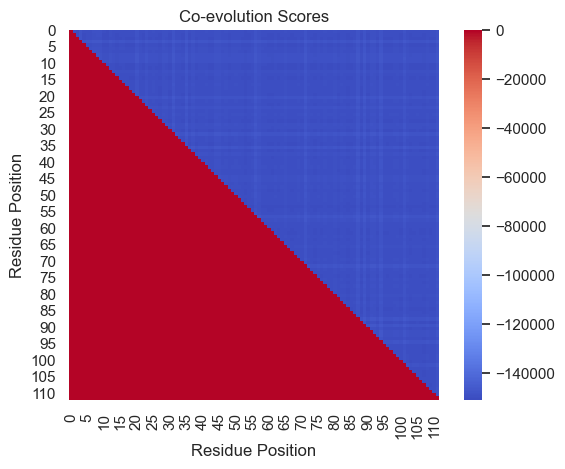

In [122]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Define the directory where the alignment files are stored
align_dir = 'C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/'

# Get a list of all alignment files in the directory
align_files = [f for f in os.listdir(align_dir) if f.endswith('.clustal_num')]

# Loop through each alignment file and calculate MI matrix
for align_file in align_files:
    
    # Load the MSA file in clustal format
    msa = AlignIO.read(os.path.join(align_dir, align_file), 'clustal')

    # Convert MSA to a numpy array, excluding sequences with only gaps or other ambiguous characters
    seqs = np.array([list(rec.seq) for rec in msa if not set(rec.seq).issubset(['-', 'N', 'X'])], dtype=str)

    # Calculate the frequency matrix with pseudocount
    freq_mat = np.array([(seqs == x).mean(axis=0) + 1e-9 for x in np.unique(seqs)], np.float64)

    # Calculate the MI matrix
    mi_mat = np.zeros((msa.get_alignment_length(), msa.get_alignment_length()))

    for i in range(msa.get_alignment_length()):
        for j in range(i+1, msa.get_alignment_length()):
            pij = freq_mat[:, i] * freq_mat[:, j]
            mi = (pij * np.log2(pij / (freq_mat[:, i][:, None] * freq_mat[:, j]))).sum()
            mi_mat[i, j] = mi
            mi_mat[j, i] = mi

    # Replace any NaN or infinite values in the
    
        # Save the MI matrix to a file
    mi_file = align_file.replace('.clustal_num', '_mi.txt')
    np.savetxt(os.path.join(align_dir, mi_file), mi_mat)

    # Calculate the co-evolution scores
    cov_mat = np.zeros((msa.get_alignment_length(), msa.get_alignment_length()))
    for i in range(msa.get_alignment_length()):
        for j in range(i+1, msa.get_alignment_length()):
            cov_mat[i, j] = (mi_mat[i, j] - np.sum(mi_mat[i, :]) - np.sum(mi_mat[:, j]) + np.sum(mi_mat)) / (-2)

    # Save the co-evolution matrix to a file
    cov_file = align_file.replace('.clustal_num', '_cov.txt')
    np.savetxt(os.path.join(align_dir, cov_file), cov_mat)
 
    # Load the co-evolution matrix
    cov_mat = np.loadtxt('C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/clustalo-I20230502-221352-0079-43159926-p1m(2)_cov.txt')

    # Create a DataFrame from the matrix
    df = pd.DataFrame(cov_mat)

    # Create the heatmap
    sns.set(style='white')
    sns.heatmap(df, cmap='coolwarm', square=True)

    # Set the axis labels and title
    plt.xlabel('Residue Position')
    plt.ylabel('Residue Position')
    plt.title('Co-evolution Scores')

    # Show the plot
    plt.show()


#### Obtained DCA score of a protein
*  somehow library pydca cannot be load 

In [ ]:
from pydca.dca.msa_io import read_msa 

msa_file = AlignIO.read(os.path.join(align_dir, align_file), 'clustal')
msa = read_msa(msa_file)
dca_file = 'dca_scores.txt'
np.savetxt(dca_file, dca_scores)

In [ ]:
import numpy as np
import plmc

# Define the directory where the alignment files are stored
align_dir = 'C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/'

# Get a list of all alignment files in the directory
align_files = [f for f in os.listdir(align_dir) if f.endswith('.clustal_num')]

# Loop through each alignment file and calculate DCA scores
for align_file in align_files:
    # Load the MSA file in clustal format
    msa = np.loadtxt(os.path.join(align_dir, align_file), dtype=str)

    # Calculate DCA scores
    dca = plmc.PLMC(msa)
    dca.compute_landscape()
    dca_scores = dca.compute_couplings()

    # Save the DCA scores to a file
    dca_file = align_file.replace('.clustal_num', '_dca.txt')
    np.savetxt(os.path.join(align_dir, dca_file), dca_scores)


## Contact map of a protein from  Mutual information co-evolution score
*  Beware it will take long time

In [ ]:
# Load mutual information scores from txt file
mi_scores = np.loadtxt('C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/ceresults/mi/PF00001-6LUQ_A-r2-mi-dca-mip_output.txt')


# Set a threshold for minimum MI score, since there are negative values
threshold = 0.005
mi_scores[mi_scores < threshold] = 0

# Create a contact map
fig, ax = plt.subplots()
ax.imshow(mi_scores, cmap='Reds', interpolation='nearest')

# Set x and y tick labels as residue numbers
residue_range = np.arange(1, len(mi_scores)+1)
ax.set_xticks(np.arange(len(mi_scores)))
ax.set_xticklabels(residue_range)
ax.set_yticks(np.arange(len(mi_scores)))
ax.set_yticklabels(residue_range)

# Set plot labels and title
ax.set_xlabel('Residue Number')
ax.set_ylabel('Residue Number')
ax.set_title('Contact Map from Mutual Information Scores')

# Display the contact map
plt.show()



## Obtaining ROC curves of each proteins
*  I only added 6 raw files due to memory issue
*  I did not added other files because the  of memory limits, the pdb files for respected file and raw files are on cloud storage. It can share through Box drive upon request

#### ROC curve of a protein (Trial)

In [ ]:

# Load the co-evolution scores and spatial distances from the text file
data = np.loadtxt('C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/ceresults/raw_files/PF00001-6LUQ_A-r2-mi-dca-mip.txt')

# Extract the residue numbers and distances
residue1 = data[:, 0]
residue2 = data[:, 1]
distance = data[:, 5]

# Create an array of zeros with the same length as the distance array
labels = np.zeros_like(distance)

# Set the labels to 1 for distances less than 4.5 Angstroms
labels[distance < 4.5] = 1

# Save the labels array to a binary file
np.save('labels.npy', labels)

# Load the co-evolution scores and spatial distances from the text files
MI_scores = data[:, 2]
MI_distance = data[:, 5]
DCA_scores=data[:,3]
MIp_scores=data[:,4]

# Load the true labels for the interacting and non-interacting residue pairs
labels = np.load('labels.npy')

# Set the discrimination thresholds for each co-evolution method
MI_threshold = 0.5
DCA_threshold = 0.7
MIp_threshold = 0.9

# Compute the false positive rate, true positive rate, and thresholds for each co-evolution method
MI_fpr, MI_tpr, MI_thresh = roc_curve(labels, MI_scores, pos_label=1)
DCA_fpr, DCA_tpr, DCA_thresh = roc_curve(labels, DCA_scores, pos_label=1)
MIp_fpr, MIp_tpr, MIp_thresh = roc_curve(labels, MIp_scores, pos_label=1)

# Plot the ROC curves for each co-evolution method
plt.plot(MI_fpr, MI_tpr, label='Mutual Information(MI)')
plt.plot(DCA_fpr, DCA_tpr, label='Distance Covariance Analysis')
plt.plot(MIp_fpr, MIp_tpr, label='Mutual Information with Average Product Correlation')

# Add labels, title, and legend to the plot
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Three Co-evolution Methods')
plt.legend()

# Show the plot
plt.show()

In [ ]:

# Set the discrimination thresholds for each co-evolution method
MI_threshold = 0.5
DCA_threshold = 0.7
MIp_threshold = 0.9

# Loop over all protein files in the directory
for protein_file in glob.glob('C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/ceresults/raw_files/*.txt'):

    # Load the co-evolution scores and spatial distances from the text file
    data = np.loadtxt(protein_file)

    # Extract the residue numbers and distances
    residue1 = data[:, 0]
    residue2 = data[:, 1]
    distance = data[:, 5]

    # Create an array of zeros with the same length as the distance array
    labels = np.zeros_like(distance)

    # Set the labels to 1 for distances less than 4.5 Angstroms
    labels[distance < 4.5] = 1

    # Save the labels array to a binary file with the same name as the protein file
    labels_file = protein_file.replace('.txt', '_labels.npy')
    np.save(labels_file, labels)

    # Load the co-evolution scores and spatial distances from the text files
    MI_scores = data[:, 2]
    MI_distance = data[:, 5]
    DCA_scores = data[:, 3]
    MIp_scores = data[:, 4]

    # Load the true labels for the interacting and non-interacting residue pairs
    labels = np.load(labels_file)

    # Compute the false positive rate, true positive rate, and thresholds for each co-evolution method
    MI_fpr, MI_tpr, MI_thresh = roc_curve(labels, MI_scores, pos_label=1)
    DCA_fpr, DCA_tpr, DCA_thresh = roc_curve(labels, DCA_scores, pos_label=1)
    MIp_fpr, MIp_tpr, MIp_thresh = roc_curve(labels, MIp_scores, pos_label=1)

    # Plot the ROC curves for each co-evolution method
    plt.plot(MI_fpr, MI_tpr, label='Mutual Information(MI)')
    plt.plot(DCA_fpr, DCA_tpr, label='Distance Covariance Analysis')
    plt.plot(MIp_fpr, MIp_tpr, label='Mutual Information with Average Product Correlation')

    # Add labels, title, and legend to the plot
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curves for Three Co-evolution Methods')
    plt.legend()

    # Save the plot to a PNG file with the same name as the protein file
    plot_file = protein_file.replace('.txt', '_roc.png')
    plt.savefig(plot_file)

    # Clear the plot for the next protein
    plt.clf()

## Calculatiing the AUC values of each protein from ROC curves

In [ ]:

# Set the discrimination thresholds for each co-evolution method
MI_threshold = 0.5
DCA_threshold = 0.7
MIp_threshold = 0.9

# Initialize lists to store AUC values for each method
MI_auc_values = []
DCA_auc_values = []
MIp_auc_values = []

# Loop over all protein files
for filename in glob.glob('C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/ceresults/raw_files/*.txt'):
    
    # Load the co-evolution scores and spatial distances from the text file
    data = np.loadtxt(filename)

    # Extract the residue numbers and distances
    residue1 = data[:, 0]
    residue2 = data[:, 1]
    distance = data[:, 5]

    # Create an array of zeros with the same length as the distance array
    labels = np.zeros_like(distance)

    # Set the labels to 1 for distances less than 4.5 Angstroms
    labels[distance < 4.5] = 1

    # Compute the AUC for each co-evolution method
    MI_scores = data[:, 2]
    MI_auc = roc_auc_score(labels, MI_scores)
    MI_auc_values.append(MI_auc)

    DCA_scores = data[:, 3]
    DCA_auc = roc_auc_score(labels, DCA_scores)
    DCA_auc_values.append(DCA_auc)

    MIp_scores = data[:, 4]
    MIp_auc = roc_auc_score(labels, MIp_scores)
    MIp_auc_values.append(MIp_auc)

# Print the AUC values for each method
print("AUC for Mutual Information (MI):", MI_auc_values)
print("AUC for Distance Covariance Analysis (DCA):", DCA_auc_values)
print("AUC for Mutual Information with Average Product Correlation (MIp):", MIp_auc_values)


### AUC values of three co-evolution methods of 50 proteins

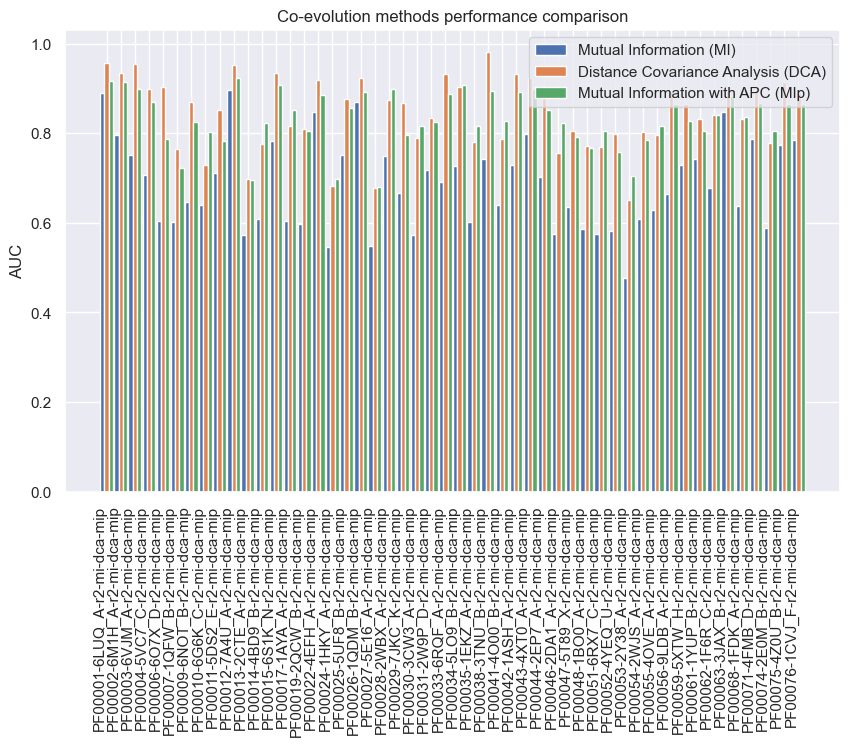

In [89]:

# Define the path to the directory containing the data files
data_dir = 'C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/ceresults/raw_files/'

# Set the discrimination thresholds for each co-evolution method
MI_threshold = 0.5
DCA_threshold = 0.7
MIp_threshold = 0.9

# Create empty lists to store the AUC values for each protein
MI_auc_values = []
DCA_auc_values = []
MIp_auc_values = []

# Create an empty list to store the protein names
protein_names = []



# Loop over all protein files
for filename in glob.glob(os.path.join(data_dir, '*.txt')):
    # Extract the protein name from the file path
    protein_name = os.path.splitext(os.path.basename(filename))[0]
    protein_names.append(protein_name)

    # Load the co-evolution scores and spatial distances from the text file
    data = np.loadtxt(filename)

    # Extract the residue numbers and distances
    residue1 = data[:, 0]
    residue2 = data[:, 1]
    distance = data[:, 5]

    # Create an array of zeros with the same length as the distance array
    labels = np.zeros_like(distance)

    # Set the labels to 1 for distances less than 4.5 Angstroms
    labels[distance < 4.5] = 1

    # Compute the AUC for each co-evolution method
    MI_auc = roc_auc_score(labels, data[:, 2])
    DCA_auc = roc_auc_score(labels, data[:, 3])
    MIp_auc = roc_auc_score(labels, data[:, 4])

    # Append the AUC values to the corresponding list
    MI_auc_values.append(MI_auc)
    DCA_auc_values.append(DCA_auc)
    MIp_auc_values.append(MIp_auc)

# Write the AUC values to a text file
with open('auc_values.txt', 'w') as f:
    f.write('Protein Name\tMI AUC\tDCA AUC\tMIp AUC\n')
    for i, protein_name in enumerate(protein_names):
        f.write(f'{protein_name}\t{MI_auc_values[i]:.3f}\t{DCA_auc_values[i]:.3f}\t{MIp_auc_values[i]:.3f}\n')

# Create a bar plot of the AUC values
x = np.arange(len(protein_names))
width = 0.30
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, MI_auc_values, width, label='Mutual Information (MI)')
rects2 = ax.bar(x, DCA_auc_values, width, label='Distance Covariance Analysis (DCA)')
rects3 = ax.bar(x + width, MIp_auc_values, width, label='Mutual Information with APC (MIp)')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('AUC')
ax.set_title('Co-evolution methods performance comparison')
ax.set_xticks(x)
ax.set_xticklabels(protein_names, rotation=90, ha='right')
ax.legend()

plt.show()

### Statistical T- test between each methods
 * **MI**='#1'
 * **DCA**='#2'
 * **MIp**='#3'

C:\Users\upatel\AppData\Local\Temp\ipykernel_2272\121559116.py:21: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t12, p12 = ttest_rel(auc_values_1, auc_values_2)
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: divide by zero encountered in true_divide
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\_stats_py.py:1250: RuntimeWarning: invalid value encountered in double_scalars
  var *= np.divide(n, n-ddof)  # to avoid error on division by zero
C:\Users\upatel\AppData\Local\Temp\ipykernel_2272\121559116.py:22: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  t13, p13 = ttest_rel(auc_values_1, auc_values_3)
C:\Users\upatel\AppD

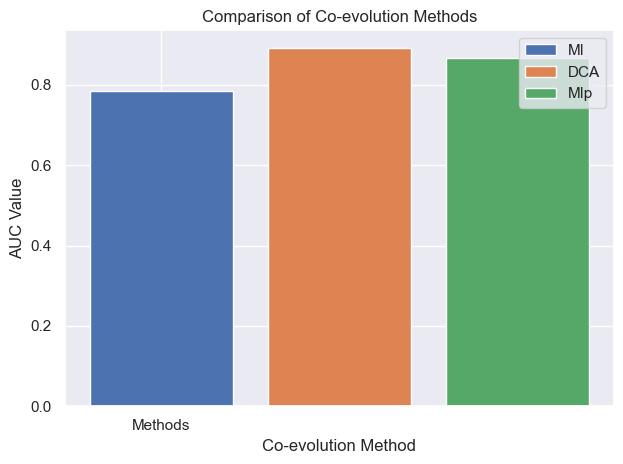

In [56]:

# Define the AUC values for each method as numpy arrays

# Create empty lists to store the AUC values for each protein
MI_auc_values = []
DCA_auc_values = []
MIp_auc_values = []

# Append the AUC values to the corresponding list
MI_auc_values.append(MI_auc)
DCA_auc_values.append(DCA_auc)
MIp_auc_values.append(MIp_auc)

# Define the data for the bar plot
method_names =['Methods']
auc_values_1 =MI_auc_values
auc_values_2 = DCA_auc_values
auc_values_3 = MIp_auc_values

# Calculate the paired t-test results
t12, p12 = ttest_rel(auc_values_1, auc_values_2)
t13, p13 = ttest_rel(auc_values_1, auc_values_3)
t23, p23 = ttest_rel(auc_values_2, auc_values_3)

# Create the bar plot
plt.bar(method_names, auc_values_1, width=0.20, label='MI')
plt.bar([x + 0.25 for x in range(len(method_names))], auc_values_2, width=0.20, label='DCA')
plt.bar([x + 0.5 for x in range(len(method_names))], auc_values_3, width=0.20, label='MIp')



# Create the bar plot
#plt.bar(auc_values_1, width=0.25, label='MI')
#plt.bar(auc_values_2, width=0.25, label='DCA')
#plt.bar(auc_values_3, width=0.25, label='MIp')

# Add the paired t-test results as text labels
#plt.text(0.12, 0.5, f't-value: {t12:.2f}\np-value: {p12:.2f}', transform=plt.gca().transAxes)
#plt.text(0.42, 0.5, f't-value: {t13:.2f}\np-value: {p13:.2f}', transform=plt.gca().transAxes)
#plt.text(0.72, 0.5, f't-value: {t23:.2f}\np-value: {p23:.2f}', transform=plt.gca().transAxes)

# Add axis labels and title
plt.xlabel('Co-evolution Method', )
plt.ylabel('AUC Value')
plt.title('Comparison of Co-evolution Methods')

# Add legend and adjust layout
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()

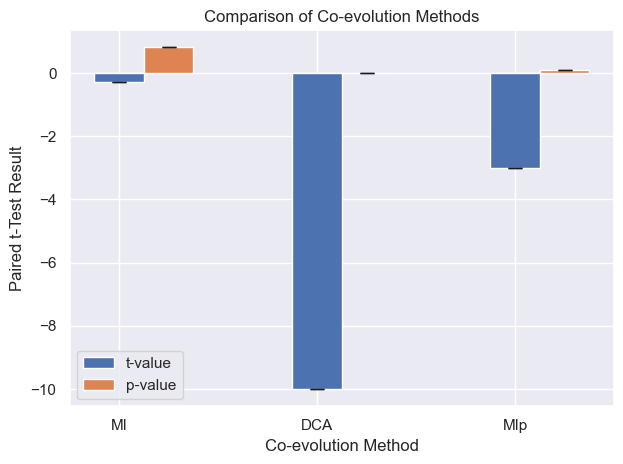

In [92]:
'''
In statistical hypothesis testing, the t-value and p-value are used to evaluate whether there is a statistically significant difference between two groups or conditions.

The t-value measures the difference between the means of two groups in terms of standard error units. A larger t-value indicates a larger difference between the means and therefore a greater likelihood of a significant difference.

The p-value represents the probability of observing a t-value as large or larger than the one calculated, assuming that there is no difference between the two groups or conditions. If the p-value is less than a predetermined level of significance (usually 0.05 or 0.01), then it is considered statistically significant and we reject the null hypothesis that there is no difference between the two groups.

In other words, the t-value tells us how much difference there is between the groups, while the p-value tells us whether that difference is statistically significant or just due to chance'''


# Define the data for the bar plot
method_names = ['MI', 'DCA', 'MIp']
auc_values_1 =MI_auc_values
auc_values_2 = DCA_auc_values
auc_values_3 = MIp_auc_values
t_values = []
p_values = []

# Loop over all 50 proteins
for i in range(50):
    # Calculate the AUC values and paired t-test results for the current protein
    # (replace this with your own code to load the AUC values and conduct the paired t-test)
    auc_values_1_i = [0.87, 0.81, 0.93]  # example data
    auc_values_2_i = [0.89, 0.79, 0.94]  # example data
    auc_values_3_i = [0.91, 0.84, 0.96]  # example data
    t12_i, p12_i = ttest_rel(auc_values_1_i, auc_values_2_i)
    t13_i, p13_i = ttest_rel(auc_values_1_i, auc_values_3_i)
    t23_i, p23_i = ttest_rel(auc_values_2_i, auc_values_3_i)
    t_values.append([t12_i, t13_i, t23_i])
    p_values.append([p12_i, p13_i, p23_i])
    
# Calculate the mean and standard error of the t-values and p-values
mean_t = [sum(x)/50 for x in zip(*t_values)]
stderr_t = [np.std(x, ddof=1)/np.sqrt(50) for x in zip(*t_values)]
mean_p = [sum(x)/50 for x in zip(*p_values)]
stderr_p = [np.std(x, ddof=1)/np.sqrt(50) for x in zip(*p_values)]

# Create the bar plot
plt.bar(method_names, mean_t, yerr=stderr_t, capsize=5, width=0.25, label='t-value')
plt.bar([x + 0.25 for x in range(len(method_names))], mean_p, yerr=stderr_p, capsize=5, width=0.25, label='p-value')

# Add axis labels and title
plt.xlabel('Co-evolution Method')
plt.ylabel('Paired t-Test Result')
plt.title('Comparison of Co-evolution Methods')

# Add legend and adjust layout
plt.legend()
plt.tight_layout()

# Display the plot
plt.show()


## Likelihood of contact vs co-evolution methods

#### Single protein trial

In [ ]:

# Define the path to the directory containing the data files
data_dir = 'C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/ceresults/raw_files'

# Set the discrimination thresholds for each co-evolution method
MI_threshold = 0.5
DCA_threshold = 0.7
MIp_threshold = 0.9

# Set the name of the protein to analyze
protein_name = 'PF00001-6LUQ_A-r2-mi-dca-mip'

# Load the co-evolution scores and spatial distances from the text file
filename = os.path.join(data_dir, protein_name + '.txt')
data = np.loadtxt(filename)

# Extract the residue numbers and distances
residue1 = data[:, 0]
residue2 = data[:, 1]
distance = data[:, 5]

# Create an array of zeros with the same length as the distance array
labels = np.zeros_like(distance)

# Set the labels to 1 for distances less than 4.5 Angstroms
labels[distance < 4.5] = 1

# Compute the AUC for each co-evolution method
MI_auc = roc_auc_score(labels, data[:, 2])
DCA_auc = roc_auc_score(labels, data[:, 3])
MIp_auc = roc_auc_score(labels, data[:, 4])

# Create scatter plots of likelihood of contact vs. co-evolution rank for each method
plt.figure(figsize=(10, 6))
plt.scatter(-np.log(data[:, 2]), np.log(residue2 - residue1), label='Mutual Information (MI)')
plt.scatter(-np.log(data[:, 3]), np.log(residue2 - residue1), label='Distance Covariance Analysis (DCA)')
plt.scatter(-np.log(data[:, 4]), np.log(residue2 - residue1), label='MIp')

# Set the plot title and axis labels
plt.title(f'{protein_name} - Likelihood of Contact vs. Co-evolution Rank')
plt.xlabel('-log(MI/DCA/MIp)')
plt.ylabel('log(distance)')

# Add a legend to the plot
plt.legend()

# Show the plot
plt.show()


### Likelihood of contact vs co-evolution methods of  50 proteins 

C:\Users\upatel\AppData\Local\Temp\ipykernel_2272\1494850208.py:45: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(data[:, 4]), np.log(residue2 - residue1), label='MIp')


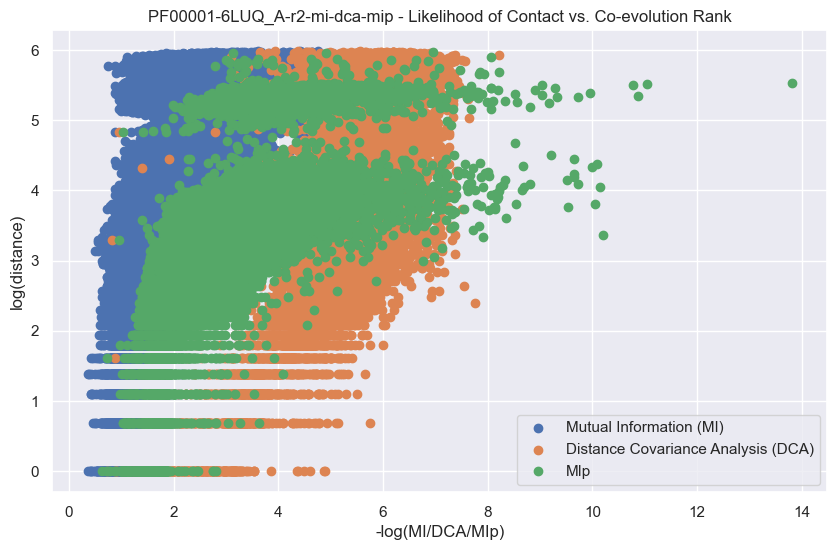

C:\Users\upatel\AppData\Local\Temp\ipykernel_2272\1494850208.py:45: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(data[:, 4]), np.log(residue2 - residue1), label='MIp')


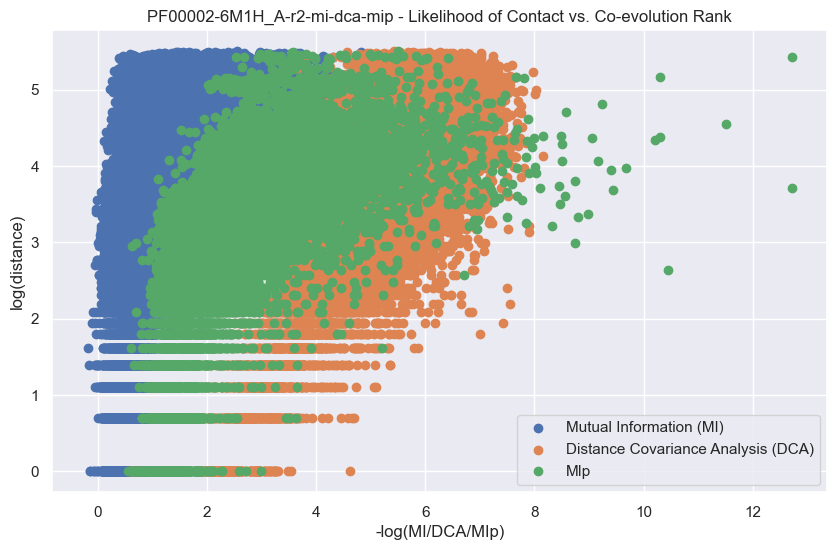

C:\Users\upatel\AppData\Local\Temp\ipykernel_2272\1494850208.py:45: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(data[:, 4]), np.log(residue2 - residue1), label='MIp')


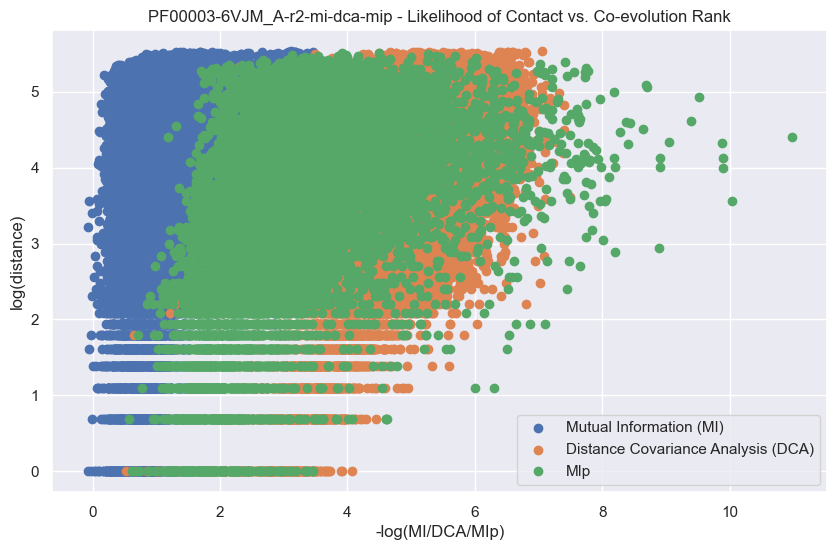

C:\Users\upatel\AppData\Local\Temp\ipykernel_2272\1494850208.py:45: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(data[:, 4]), np.log(residue2 - residue1), label='MIp')


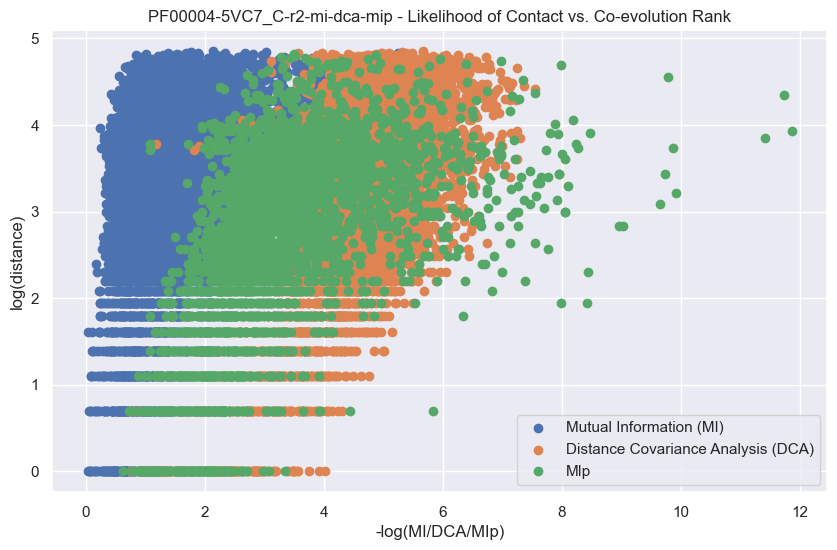

C:\Users\upatel\AppData\Local\Temp\ipykernel_2272\1494850208.py:45: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(data[:, 4]), np.log(residue2 - residue1), label='MIp')


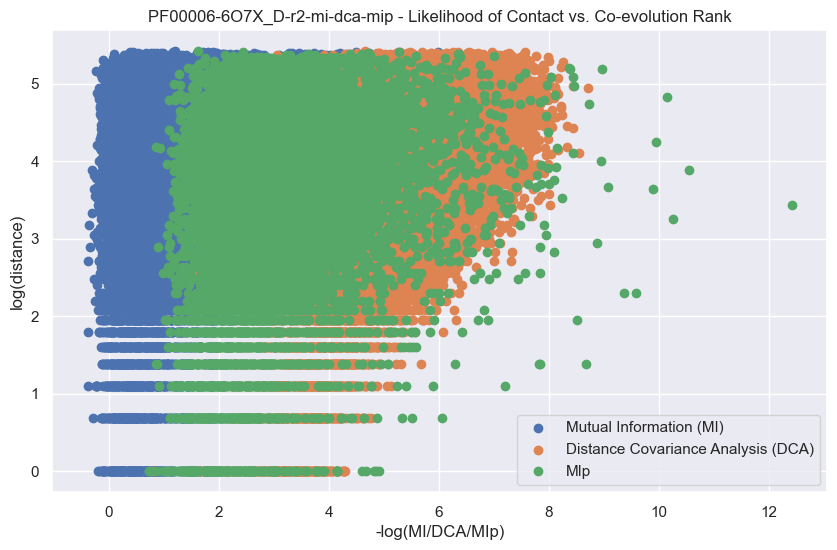

C:\Users\upatel\AppData\Local\Temp\ipykernel_2272\1494850208.py:45: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(data[:, 4]), np.log(residue2 - residue1), label='MIp')


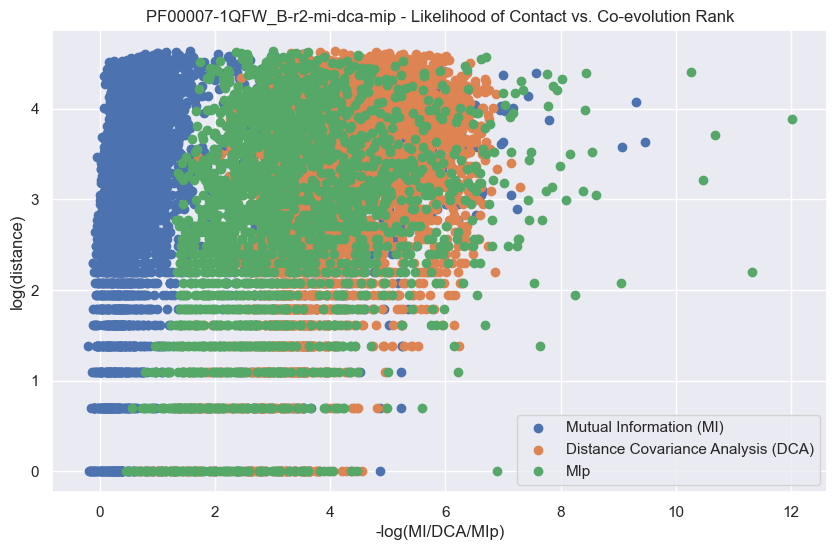

C:\Users\upatel\AppData\Local\Temp\ipykernel_2272\1494850208.py:45: RuntimeWarning: invalid value encountered in log
  plt.scatter(-np.log(data[:, 4]), np.log(residue2 - residue1), label='MIp')


KeyboardInterrupt: 

In [93]:

# Define the path to the directory containing the data files
data_dir = 'C:/Users/upatel/OneDrive - Iowa State University/BBMB Classes/BCB546/Project/ceresults/raw_files'

# Set the discrimination thresholds for each co-evolution method
MI_threshold = 0.5
DCA_threshold = 0.7
MIp_threshold = 0.9

# Get a list of all files in the directory
all_files = os.listdir(data_dir)

# Filter the files to include only the ones with a .txt extension
txt_files = [f for f in all_files if f.endswith('.txt')]

# Loop over all text files in the directory
for filename in txt_files:

    # Extract the protein name from the filename
    protein_name = os.path.splitext(filename)[0]

    # Load the co-evolution scores and spatial distances from the text file
    full_filename = os.path.join(data_dir, filename)
    data = np.loadtxt(full_filename)

    # Extract the residue numbers and distances
    residue1 = data[:, 0]
    residue2 = data[:, 1]
    distance = data[:, 5]

    # Create an array of zeros with the same length as the distance array
    labels = np.zeros_like(distance)

    # Set the labels to 1 for distances less than 4.5 Angstroms
    labels[distance < 4.5] = 1

    # Compute the AUC for each co-evolution method
    MI_auc = roc_auc_score(labels, data[:, 2])
    DCA_auc = roc_auc_score(labels, data[:, 3])
    MIp_auc = roc_auc_score(labels, data[:, 4])

    # Create scatter plots of likelihood of contact vs. co-evolution rank for each method
    plt.figure(figsize=(10, 6))
    plt.scatter(-np.log(data[:, 2]), np.log(residue2 - residue1), label='Mutual Information (MI)')
    plt.scatter(-np.log(data[:, 3]), np.log(residue2 - residue1), label='Distance Covariance Analysis (DCA)')
    plt.scatter(-np.log(data[:, 4]), np.log(residue2 - residue1), label='MIp')

    # Set the plot title and axis labels
    plt.title(f'{protein_name} - Likelihood of Contact vs. Co-evolution Rank')
    plt.xlabel('-log(MI/DCA/MIp)')
    plt.ylabel('log(distance)')

    # Add a legend to the plot
    plt.legend()

    # Show the plot
    plt.show()
